In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import numpy as np
from datetime import datetime

In [2]:
june_trips = pd.read_csv('../data/june_trip.csv')

In [3]:
june_trips.startTime = pd.to_datetime(june_trips.startTime)
june_trips.startDate = pd.to_datetime(june_trips.startDate)
june_trips.endTime = pd.to_datetime(june_trips.endTime)
june_trips.endDate = pd.to_datetime(june_trips.endDate)
june_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205627 entries, 0 to 205626
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   pubTimeStamp    205627 non-null  object        
 1   companyName     205627 non-null  object        
 2   tripRecordNum   205627 non-null  object        
 3   sumdID          205627 non-null  object        
 4   tripDuration    205627 non-null  float64       
 5   tripDistance    205627 non-null  float64       
 6   startDate       205627 non-null  datetime64[ns]
 7   startTime       205627 non-null  datetime64[ns]
 8   endDate         205627 non-null  datetime64[ns]
 9   endTime         205627 non-null  datetime64[ns]
 10  startLatitude   205627 non-null  float64       
 11  startLongitude  205627 non-null  float64       
 12  endLatitude     205627 non-null  float64       
 13  endLongitude    205627 non-null  float64       
 14  tripRoute       205627 non-null  obj

In [4]:
june_trips['startTime_clean'] = pd.DatetimeIndex(june_trips['startTime']).time
june_trips['endTime_clean'] = pd.DatetimeIndex(june_trips['endTime']).time
june_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startTime_clean,endTime_clean
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,4.0,328.084000,2019-06-01,2021-10-26 00:02:18.203333,2019-06-01,2021-10-26 00:06:16.406666,36.164400,-86.78070,36.163600,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000,00:02:18.203333,00:06:16.406666
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,5.0,4921.260000,2019-06-01,2021-10-26 00:02:44.803333,2019-06-01,2021-10-26 00:07:28.286666,36.175300,-86.79430,36.175300,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000,00:02:44.803333,00:07:28.286666
2,2019-06-01 00:09:54,Gotcha,GOT1,Powered327,12.0,12.426575,2019-06-01,2021-10-26 00:09:56.000000,2019-06-01,2021-10-26 00:21:56.000000,36.161501,-86.77601,36.152529,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000,00:09:56,00:21:56
3,2019-06-01 00:10:46.957000,Bird,BRD3610,Powered8U1A6,2.0,0.000000,2019-06-01,2021-10-26 00:10:31.163333,2019-06-01,2021-10-26 00:12:02.773333,36.164000,-86.78070,36.163100,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000,00:10:31.163333,00:12:02.773333
4,2019-06-01 00:10:46.957000,Bird,BRD3612,PoweredSPI1T,5.0,656.168000,2019-06-01,2021-10-26 00:07:21.430000,2019-06-01,2021-10-26 00:12:30.913333,36.165000,-86.77990,36.165900,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000,00:07:21.430000,00:12:30.913333


In [5]:
june_trips['startDate'] = june_trips['startDate'].astype('str')
june_trips['startTime_clean'] = june_trips['startTime_clean'].astype('str')
june_trips['startDateTime_clean'] = june_trips['startDate'] + ' ' + june_trips['startTime_clean']
june_trips['endDate'] = june_trips['endDate'].astype('str')
june_trips['endTime_clean'] = june_trips['endTime_clean'].astype('str')
june_trips['endDateTime_clean'] = june_trips['endDate'] + ' ' + june_trips['endTime_clean']
june_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startTime_clean,endTime_clean,startDateTime_clean,endDateTime_clean
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,4.0,328.084000,2019-06-01,2021-10-26 00:02:18.203333,2019-06-01,2021-10-26 00:06:16.406666,36.164400,-86.78070,36.163600,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000,00:02:18.203333,00:06:16.406666,2019-06-01 00:02:18.203333,2019-06-01 00:06:16.406666
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,5.0,4921.260000,2019-06-01,2021-10-26 00:02:44.803333,2019-06-01,2021-10-26 00:07:28.286666,36.175300,-86.79430,36.175300,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000,00:02:44.803333,00:07:28.286666,2019-06-01 00:02:44.803333,2019-06-01 00:07:28.286666
2,2019-06-01 00:09:54,Gotcha,GOT1,Powered327,12.0,12.426575,2019-06-01,2021-10-26 00:09:56.000000,2019-06-01,2021-10-26 00:21:56.000000,36.161501,-86.77601,36.152529,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000,00:09:56,00:21:56,2019-06-01 00:09:56,2019-06-01 00:21:56
3,2019-06-01 00:10:46.957000,Bird,BRD3610,Powered8U1A6,2.0,0.000000,2019-06-01,2021-10-26 00:10:31.163333,2019-06-01,2021-10-26 00:12:02.773333,36.164000,-86.78070,36.163100,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000,00:10:31.163333,00:12:02.773333,2019-06-01 00:10:31.163333,2019-06-01 00:12:02.773333
4,2019-06-01 00:10:46.957000,Bird,BRD3612,PoweredSPI1T,5.0,656.168000,2019-06-01,2021-10-26 00:07:21.430000,2019-06-01,2021-10-26 00:12:30.913333,36.165000,-86.77990,36.165900,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000,00:07:21.430000,00:12:30.913333,2019-06-01 00:07:21.430000,2019-06-01 00:12:30.913333


In [6]:
june_trips.endDateTime_clean = pd.to_datetime(june_trips.endDateTime_clean)
june_trips.startDateTime_clean = pd.to_datetime(june_trips.startDateTime_clean)
june_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205627 entries, 0 to 205626
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   pubTimeStamp         205627 non-null  object        
 1   companyName          205627 non-null  object        
 2   tripRecordNum        205627 non-null  object        
 3   sumdID               205627 non-null  object        
 4   tripDuration         205627 non-null  float64       
 5   tripDistance         205627 non-null  float64       
 6   startDate            205627 non-null  object        
 7   startTime            205627 non-null  datetime64[ns]
 8   endDate              205627 non-null  object        
 9   endTime              205627 non-null  datetime64[ns]
 10  startLatitude        205627 non-null  float64       
 11  startLongitude       205627 non-null  float64       
 12  endLatitude          205627 non-null  float64       
 13  endLongitude  

In [7]:
june_trips['duration_clean'] = june_trips['endDateTime_clean'] - june_trips['startDateTime_clean']
june_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205627 entries, 0 to 205626
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   pubTimeStamp         205627 non-null  object         
 1   companyName          205627 non-null  object         
 2   tripRecordNum        205627 non-null  object         
 3   sumdID               205627 non-null  object         
 4   tripDuration         205627 non-null  float64        
 5   tripDistance         205627 non-null  float64        
 6   startDate            205627 non-null  object         
 7   startTime            205627 non-null  datetime64[ns] 
 8   endDate              205627 non-null  object         
 9   endTime              205627 non-null  datetime64[ns] 
 10  startLatitude        205627 non-null  float64        
 11  startLongitude       205627 non-null  float64        
 12  endLatitude          205627 non-null  float64        
 13 

In [8]:
june_trips['duration_sec'] = (june_trips.duration_clean / np.timedelta64(1,'s')).astype(int)
june_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,endLatitude,endLongitude,tripRoute,create_dt,startTime_clean,endTime_clean,startDateTime_clean,endDateTime_clean,duration_clean,duration_sec
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,4.0,328.084000,2019-06-01,2021-10-26 00:02:18.203333,2019-06-01,2021-10-26 00:06:16.406666,...,36.163600,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000,00:02:18.203333,00:06:16.406666,2019-06-01 00:02:18.203333,2019-06-01 00:06:16.406666,0 days 00:03:58.203333,238
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,5.0,4921.260000,2019-06-01,2021-10-26 00:02:44.803333,2019-06-01,2021-10-26 00:07:28.286666,...,36.175300,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000,00:02:44.803333,00:07:28.286666,2019-06-01 00:02:44.803333,2019-06-01 00:07:28.286666,0 days 00:04:43.483333,283
2,2019-06-01 00:09:54,Gotcha,GOT1,Powered327,12.0,12.426575,2019-06-01,2021-10-26 00:09:56.000000,2019-06-01,2021-10-26 00:21:56.000000,...,36.152529,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000,00:09:56,00:21:56,2019-06-01 00:09:56.000000,2019-06-01 00:21:56.000000,0 days 00:12:00,720
3,2019-06-01 00:10:46.957000,Bird,BRD3610,Powered8U1A6,2.0,0.000000,2019-06-01,2021-10-26 00:10:31.163333,2019-06-01,2021-10-26 00:12:02.773333,...,36.163100,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000,00:10:31.163333,00:12:02.773333,2019-06-01 00:10:31.163333,2019-06-01 00:12:02.773333,0 days 00:01:31.610000,91
4,2019-06-01 00:10:46.957000,Bird,BRD3612,PoweredSPI1T,5.0,656.168000,2019-06-01,2021-10-26 00:07:21.430000,2019-06-01,2021-10-26 00:12:30.913333,...,36.165900,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000,00:07:21.430000,00:12:30.913333,2019-06-01 00:07:21.430000,2019-06-01 00:12:30.913333,0 days 00:05:09.483333,309


In [10]:
june_trips['duration_sec'] = (june_trips.duration_clean / np.timedelta64(1,'s')).astype(int)
june_trips['duration_min'] = june_trips.duration_sec / 60
june_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,endLongitude,tripRoute,create_dt,startTime_clean,endTime_clean,startDateTime_clean,endDateTime_clean,duration_clean,duration_sec,duration_min
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,4.0,328.084000,2019-06-01,2021-10-26 00:02:18.203333,2019-06-01,2021-10-26 00:06:16.406666,...,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000,00:02:18.203333,00:06:16.406666,2019-06-01 00:02:18.203333,2019-06-01 00:06:16.406666,0 days 00:03:58.203333,238,3.966667
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,5.0,4921.260000,2019-06-01,2021-10-26 00:02:44.803333,2019-06-01,2021-10-26 00:07:28.286666,...,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000,00:02:44.803333,00:07:28.286666,2019-06-01 00:02:44.803333,2019-06-01 00:07:28.286666,0 days 00:04:43.483333,283,4.716667
2,2019-06-01 00:09:54,Gotcha,GOT1,Powered327,12.0,12.426575,2019-06-01,2021-10-26 00:09:56.000000,2019-06-01,2021-10-26 00:21:56.000000,...,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000,00:09:56,00:21:56,2019-06-01 00:09:56.000000,2019-06-01 00:21:56.000000,0 days 00:12:00,720,12.000000
3,2019-06-01 00:10:46.957000,Bird,BRD3610,Powered8U1A6,2.0,0.000000,2019-06-01,2021-10-26 00:10:31.163333,2019-06-01,2021-10-26 00:12:02.773333,...,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000,00:10:31.163333,00:12:02.773333,2019-06-01 00:10:31.163333,2019-06-01 00:12:02.773333,0 days 00:01:31.610000,91,1.516667
4,2019-06-01 00:10:46.957000,Bird,BRD3612,PoweredSPI1T,5.0,656.168000,2019-06-01,2021-10-26 00:07:21.430000,2019-06-01,2021-10-26 00:12:30.913333,...,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000,00:07:21.430000,00:12:30.913333,2019-06-01 00:07:21.430000,2019-06-01 00:12:30.913333,0 days 00:05:09.483333,309,5.150000


In [11]:
june_trips = june_trips.drop(columns = ['duration_sec', 'startTime_clean', 'endTime_clean'])
june_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startDateTime_clean,endDateTime_clean,duration_clean,duration_min
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,4.0,328.084000,2019-06-01,2021-10-26 00:02:18.203333,2019-06-01,2021-10-26 00:06:16.406666,36.164400,-86.78070,36.163600,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000,2019-06-01 00:02:18.203333,2019-06-01 00:06:16.406666,0 days 00:03:58.203333,3.966667
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,5.0,4921.260000,2019-06-01,2021-10-26 00:02:44.803333,2019-06-01,2021-10-26 00:07:28.286666,36.175300,-86.79430,36.175300,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000,2019-06-01 00:02:44.803333,2019-06-01 00:07:28.286666,0 days 00:04:43.483333,4.716667
2,2019-06-01 00:09:54,Gotcha,GOT1,Powered327,12.0,12.426575,2019-06-01,2021-10-26 00:09:56.000000,2019-06-01,2021-10-26 00:21:56.000000,36.161501,-86.77601,36.152529,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000,2019-06-01 00:09:56.000000,2019-06-01 00:21:56.000000,0 days 00:12:00,12.000000
3,2019-06-01 00:10:46.957000,Bird,BRD3610,Powered8U1A6,2.0,0.000000,2019-06-01,2021-10-26 00:10:31.163333,2019-06-01,2021-10-26 00:12:02.773333,36.164000,-86.78070,36.163100,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000,2019-06-01 00:10:31.163333,2019-06-01 00:12:02.773333,0 days 00:01:31.610000,1.516667
4,2019-06-01 00:10:46.957000,Bird,BRD3612,PoweredSPI1T,5.0,656.168000,2019-06-01,2021-10-26 00:07:21.430000,2019-06-01,2021-10-26 00:12:30.913333,36.165000,-86.77990,36.165900,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000,2019-06-01 00:07:21.430000,2019-06-01 00:12:30.913333,0 days 00:05:09.483333,5.150000


In [12]:
june_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205627 entries, 0 to 205626
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   pubTimeStamp         205627 non-null  object         
 1   companyName          205627 non-null  object         
 2   tripRecordNum        205627 non-null  object         
 3   sumdID               205627 non-null  object         
 4   tripDuration         205627 non-null  float64        
 5   tripDistance         205627 non-null  float64        
 6   startDate            205627 non-null  object         
 7   startTime            205627 non-null  datetime64[ns] 
 8   endDate              205627 non-null  object         
 9   endTime              205627 non-null  datetime64[ns] 
 10  startLatitude        205627 non-null  float64        
 11  startLongitude       205627 non-null  float64        
 12  endLatitude          205627 non-null  float64        
 13 

In [14]:
june_adj = june_trips.loc[(june_trips.duration_min < 60)]
june_adj.describe()

,tripDuration,tripDistance,startLatitude,startLongitude,endLatitude,endLongitude,duration_clean,duration_min
count,199945.000000,1.999450e+05,199945.000000,199945.000000,199945.000000,199945.000000,199945,199945.000000
mean,61.417830,4.837869e+03,36.156221,-86.784571,36.156232,-86.784519,0 days 00:12:56.166313452,12.932342
std,281.534168,4.416943e+04,0.012105,0.013846,0.171862,0.616730,0 days 00:11:18.137198307,11.302509
min,-8.003717,-5.157480e+05,36.042892,-86.917893,-36.850405,-122.428964,-1 days +23:51:59.776666,-8.000000
25%,5.000000,8.759800e+02,36.150630,-86.792072,36.150854,-86.792060,0 days 00:04:55.743333,4.916667
50%,10.000000,3.261115e+03,36.157100,-86.782066,36.157532,-86.781732,0 days 00:09:24,9.400000
75%,18.950000,6.660024e+03,36.163027,-86.776500,36.163030,-86.776400,0 days 00:17:10.520000,17.166667
max,3599.000000,1.848950e+07,36.300029,-86.602127,47.613101,174.764886,0 days 00:59:59.936667,59.983333


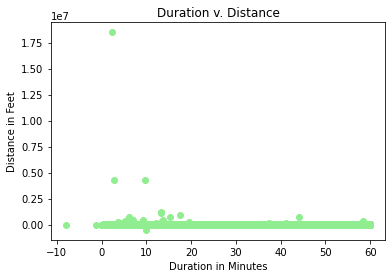

In [18]:
plt.scatter('duration_min', 'tripDistance', data = june_adj, color = 'lightgreen')
plt.xlabel('Duration in Minutes')
plt.ylabel('Distance in Feet')
plt.title('Duration v. Distance')
plt.show()

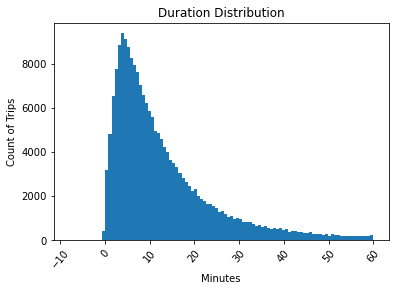

In [17]:
plt.hist(june_adj.duration_min, bins = 100)
plt.xticks(rotation=50)
plt.title('Duration Distribution')
plt.xlabel('Minutes')
plt.ylabel('Count of Trips')
plt.show()